# Tracer la ligne d'horizon d'une image

In [2]:
import cv2 # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

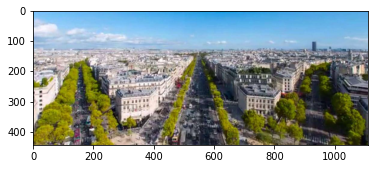

In [3]:
image = cv2.imread('test_paris.jpg') 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # (pour avoir les couleurs d'origine)
plt.show()

### Première idée : tracer les contours dans l'image

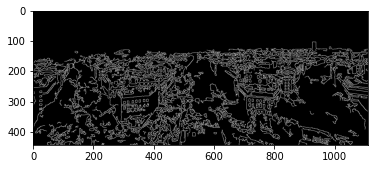

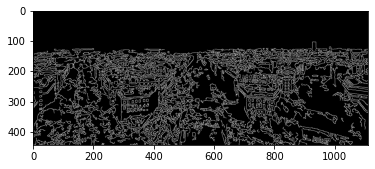

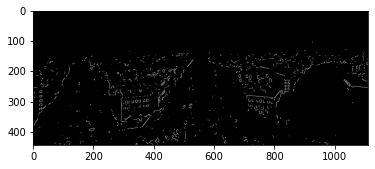

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
wide = cv2.Canny(blurred, 10, 200)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

plt.imshow(wide, cmap = 'gray')
plt.figure()
plt.imshow(mid, cmap = 'gray')
plt.figure()
plt.imshow(tight, cmap = 'gray')
plt.show()

def func_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    mid = cv2.Canny(blurred, 30, 150)
    plt.imshow(mid, cmap = 'gray')
    plt.figure()

En prenant alors le pixel blanc le plus haut, de chaque colonne de pixels, on peut obtenir une ligne d'horizon :

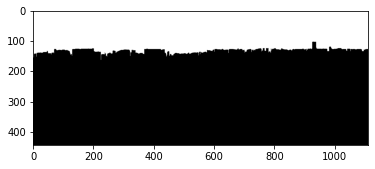

In [5]:
def horizon_from_edges(edges_image):
    shape = np.shape(edges_image)
    args = []
    for line in edges_image.T: 
        args.append(np.argmax(line))

    horizon = np.zeros(shape)
    for i in range(shape[1]):
        horizon[:args[i], i]= 255
    
    ### la suite de la fonction permet de améliorer les contours des formes creuses
    up = []
    down = []
    for i in range(1,len(args)):
        if args[i]-args[i-1] > 50 :
            up.append(i)
        elif args[i]-args[i-1] < -50 :
            down.append(i)

    for i in up :
        upper = args[i]
        lower = args[i-1]
        li = lower
        while li<=upper :
            column = i
            while column > 0 and edges_image[li][column] == 0:
                horizon[li][column]=255
                column-=1
            li+=1
    for i in down :
        upper = args[i-1]
        lower = args[i]
        li = lower
        while li<=upper :
            column = i
            while column < np.shape(edges_image)[1] and edges_image[li][column] == 0:
                horizon[li][column]=255
                column+=1
            li+=1
    
    return(horizon)

horizon = horizon_from_edges(mid)

plt.imshow(horizon, cmap = 'gray')
plt.show()

### Deuxième idée : seuiller l'image pour ne garder que les pixels de la couleur du ciel

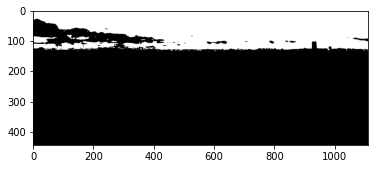

In [6]:
def thresholg_image(image, b=200, rg=210):  
    (B, G, R) = cv2.split(image)

    mask1 = B<b # supress the pixels with not enough blue
    mask2 = (R+0.2*G)>rg # supress the pixels too red or green
    # Rq : ce masque est à améliorer en précisant un peu mieux la couleur du ciel : peut-être utile de la préciser en entrée du code
    mask = mask1 | mask2

    thresh = image.copy()
    thresh[mask] = 0
    thresh[~mask]=255
    return(thresh)

threshold = thresholg_image(image)
plt.imshow(threshold, cmap = 'gray')
plt.show()

On garde lors le pixel blanc le plus bas de chaque colonne pour tracer l'horizon

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


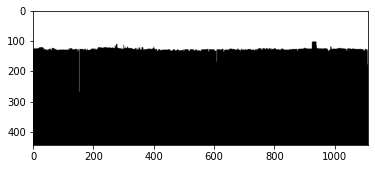

In [7]:
def horizon_from_threshold_not_corrected(image):
    shape = np.shape(image)
    args=[]
    for line in image.T[1]:
        args.append(shape[0]-np.argmax(line[::-1]))

    horizon = np.zeros(shape)
    for i in range(shape[1]):
        horizon[:args[i], i]= [255,255,255]
    return(horizon)
horizon2 = horizon_from_threshold_not_corrected(threshold)
plt.imshow(horizon2, cmap = 'gray')
plt.show()

Avec une petie correction pour éviter les pixels couleur ciel trop bas

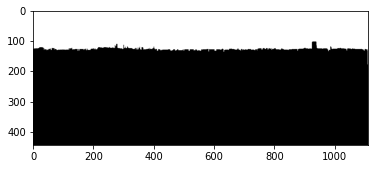

In [8]:
def horizon_from_threshold(image):
    shape = np.shape(image)
    args = []
    for line in image.T[1]: 
        args.append(shape[0]-np.argmax(line[::-1]))

    horizon = np.zeros(shape[:-1])
    horizon[:args[0], 0]= 255
    horizon[:args[shape[1]-1], shape[1]-1]= 255
    for i in range(1, shape[1]-1):
        if abs(args[i]-args[i+1]) < 30 or abs(args[i]-args[i-1]) < 30 :
            horizon[:args[i], i]= 255
        else :
            horizon[:args[i-1], i]= 255
    return(horizon)

horizon2 = horizon_from_threshold(threshold)
plt.imshow(horizon2, cmap = 'gray')
plt.show()

#### Finalement : les fonctions des deux méthodes

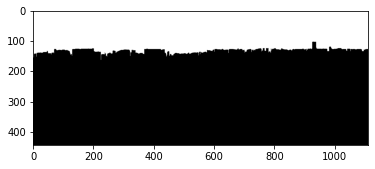

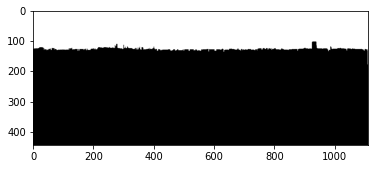

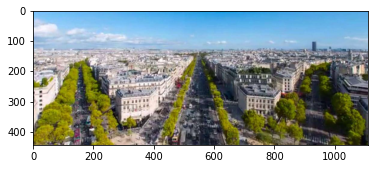

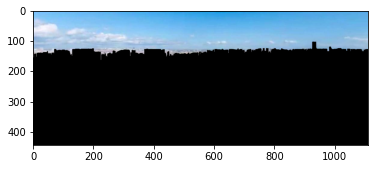

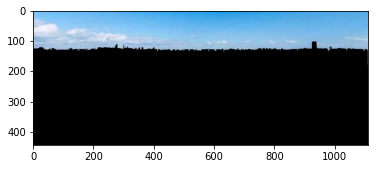

In [9]:
def horizon_1(image, threshold1 = 30, threshold2 = 170):
    image = cv2.imread(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, threshold1, threshold2)
    horizon = horizon_from_edges(edges)
    plt.imshow(horizon, cmap = 'gray')
    plt.show()

def horizon_2(image, b=200, rg=210):
    image = cv2.imread(image)
    horizon = horizon_from_threshold(thresholg_image(image, b, rg))
    plt.imshow(horizon, cmap = 'gray')
    plt.show()

horizon_1('test_paris.jpg', 30, 150)
horizon_2('test_paris.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

mask = horizon>200
image_1 = image.copy()
image_1[~mask] = [0,0,0]
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)) 
plt.show()

mask = horizon2>200
image_2 = image.copy()
image_2[~mask] = [0,0,0]
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.show()


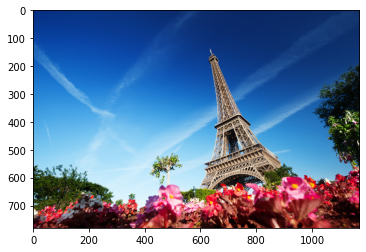

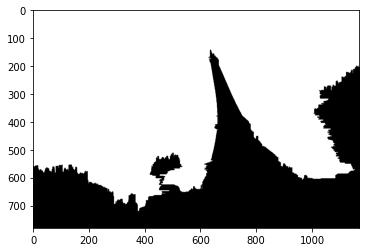

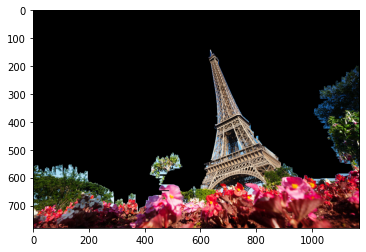

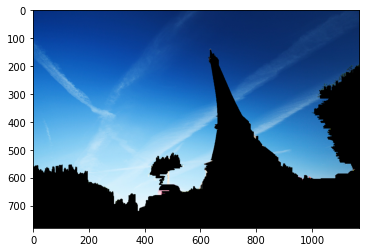

In [10]:
name = 'tour_eiffel.jpg'
image = cv2.imread(name) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# func_edges(image)
horizon_1(name)
# horizon_2(name,200,100)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
mid = cv2.Canny(blurred, 30, 170)
horizon = horizon_from_edges(mid)
mask = horizon >200
image_2 = image.copy()
image_2[mask] = [0,0,0]
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.show()
image_2 = image.copy()
image_2[~mask] = [0,0,0]
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.show()
hihi

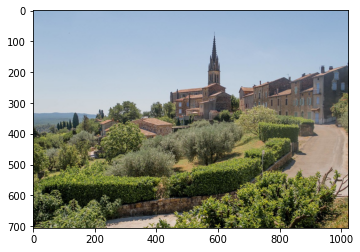

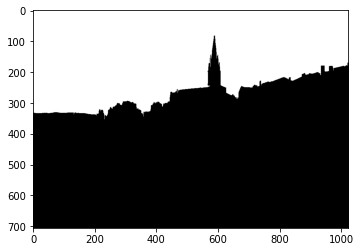

In [11]:
name = 'banne.jpg'
image = cv2.imread(name) 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
horizon_1(name)
# horizon_2(name, 220, 260)

(1368, 1824, 3)


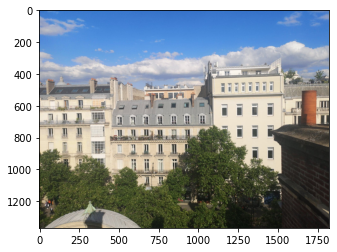

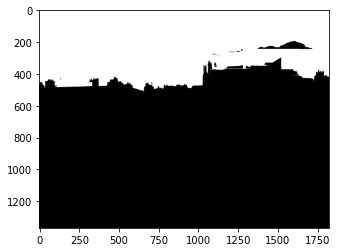

In [12]:
name = 'mines.jpg'
image = cv2.imread(name) 
print(np.shape(image))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# func_edges(image)
horizon_1(name)
# horizon_2(name, 220, 260)

(1368, 1824, 3)


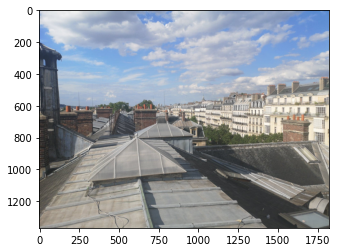

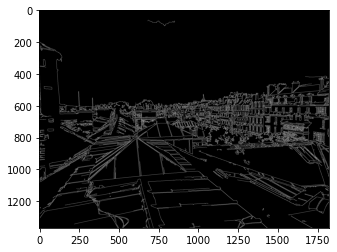

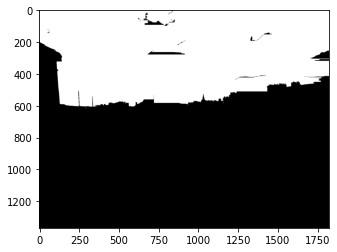

In [14]:
name = 'mines2.jpg'
image = cv2.imread(name) 
print(np.shape(image))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
func_edges(image)
horizon_1(name,10,100)
# horizon_2(name, 220, 260)

Conclusions : 

- Même si la deuxième méthode semblait mieux fonctionner sur la première image (sur laquelle on l'a codée), elle s'adapte plus difficilement à d'autres images tant qu'on n'a pas de reconnaissance automatique de la couleur du ciel. Par contre la première s'adapte bien.
- Il y en aura toujours pour nous les briser